# Introduction

This notebook is a 'quick-start' for the [CGIAR Crop Yield Prediction Challenge](https://zindi.africa/competitions/cgiar-crop-yield-prediction-challenge). We'll take a look at the data, fit a quick model and make a submission, with hints at each stage for extra options to investigate.

Let's dive in!

# Setup

You can get the zip files from Zindi or add to your Google drive using the following links:

Test data: https://drive.google.com/file/d/1yTEgzn8JJn0mZmJ7NDUbwAB1WSzwRScB/view?usp=sharing

Training data: 
https://drive.google.com/file/d/1-0UNiBpvfdRq8rgUC3Kb22YPWP_YnoKj/view?usp=sharing

You'll also need the smaller files from Zindi (Train.csv, SampleSubmission.csv and bandnames.txt) which you can just upload using the files tab.

# Loading the data

The data isn't a simple table - instead we must read the inputs from individual .npy files. Here we'll load the dataframes, open a file or two and take a look at the format.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# Train.csv has the Field_IDs needed to find the npy files
train = pd.read_csv('data/Train.csv')
print(train.shape)
train.head()

(2977, 4)


,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


Loading data/image_arrays_train/I3NEYT4.npy as an array
Array shape: (360, 41, 41)


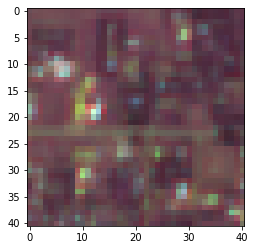

In [15]:
# Look at a sample:
fid = train['Field_ID'].sample().values[0]
fn = f'data/image_arrays_train/{fid}.npy' # File name based on Field_ID
print(f'Loading {fn} as an array')
arr = np.load(fn) # Loading the data with numpy
print('Array shape:', arr.shape) # 360 bands, images 40 or 41px a side
rgb_jan = np.stack([arr[4], arr[3], arr[2]], axis=-1) # Combine three bands for viewing
rgb_jan = rgb_jan / np.max(rgb_jan) # Scale band values to (0, 1) for easy image display
plt.imshow(rgb_jan) # View with matplotlib

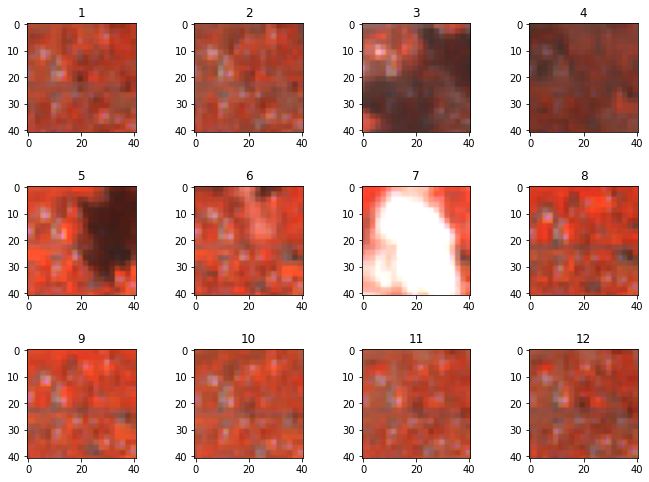

In [16]:
# View false colour images from each month in the year:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  rgb = np.stack([arr[i*30 + 8], arr[i*30 + 4], arr[i*30 + 3]], axis=-1) # False colour (band 8, 4 and 3)
  rgb = rgb / 4000 # Scaling consistently 
  axs[i].imshow(rgb.clip(0, 1))
  axs[i].set_title(str(i+1))

What's with the white fluffy stuff? These are clouds - the bane of all remote sensing analysts...

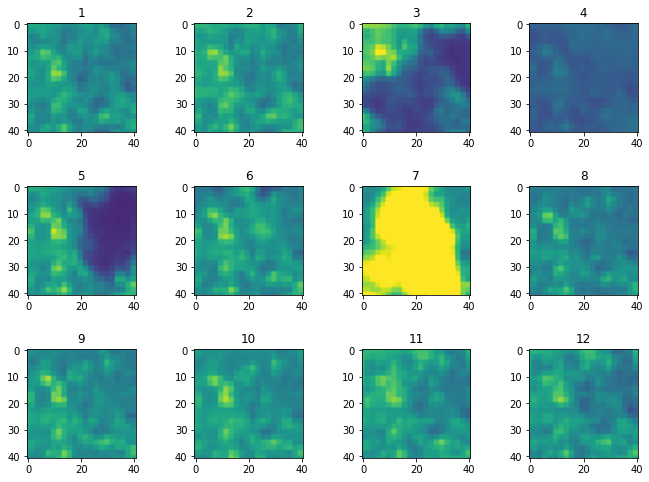

In [17]:
# Show the SWIR band (B12) where clouds have a high reflectance
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  cloud = arr[i*30 + 11]
  axs[i].imshow(cloud, vmin=0, vmax=4000)
  axs[i].set_title(str(i+1))

# Sampling from the images

There are some hard-coded band indexes in the examples above that won't have made sense - how did we know which bands were which?
There are 30 bands for each month. You can see the full list of bands with:

In [18]:
# band_names = [l.strip() for l in open('bandnames.txt', 'r').readlines()]
# print(band_names)
band_names = ['0_S2_B1', '0_S2_B2', '0_S2_B3', '0_S2_B4', '0_S2_B5', '0_S2_B6', '0_S2_B7', '0_S2_B8', '0_S2_B8A', '0_S2_B9', '0_S2_B10', '0_S2_B11', '0_S2_B12', '0_S2_QA10', '0_S2_QA20', '0_S2_QA60', '0_CLIM_aet', '0_CLIM_def', '0_CLIM_pdsi', '0_CLIM_pet', '0_CLIM_pr', '0_CLIM_ro', '0_CLIM_soil', '0_CLIM_srad', '0_CLIM_swe', '0_CLIM_tmmn', '0_CLIM_tmmx', '0_CLIM_vap', '0_CLIM_vpd', '0_CLIM_vs', '1_S2_B1', '1_S2_B2', '1_S2_B3', '1_S2_B4', '1_S2_B5', '1_S2_B6', '1_S2_B7', '1_S2_B8', '1_S2_B8A', '1_S2_B9', '1_S2_B10', '1_S2_B11', '1_S2_B12', '1_S2_QA10', '1_S2_QA20', '1_S2_QA60', '1_CLIM_aet', '1_CLIM_def', '1_CLIM_pdsi', '1_CLIM_pet', '1_CLIM_pr', '1_CLIM_ro', '1_CLIM_soil', '1_CLIM_srad', '1_CLIM_swe', '1_CLIM_tmmn', '1_CLIM_tmmx', '1_CLIM_vap', '1_CLIM_vpd', '1_CLIM_vs', '2_S2_B1', '2_S2_B2', '2_S2_B3', '2_S2_B4', '2_S2_B5', '2_S2_B6', '2_S2_B7', '2_S2_B8', '2_S2_B8A', '2_S2_B9', '2_S2_B10', '2_S2_B11', '2_S2_B12', '2_S2_QA10', '2_S2_QA20', '2_S2_QA60', '2_CLIM_aet', '2_CLIM_def', '2_CLIM_pdsi', '2_CLIM_pet', '2_CLIM_pr', '2_CLIM_ro', '2_CLIM_soil', '2_CLIM_srad', '2_CLIM_swe', '2_CLIM_tmmn', '2_CLIM_tmmx', '2_CLIM_vap', '2_CLIM_vpd', '2_CLIM_vs', '3_S2_B1', '3_S2_B2', '3_S2_B3', '3_S2_B4', '3_S2_B5', '3_S2_B6', '3_S2_B7', '3_S2_B8', '3_S2_B8A', '3_S2_B9', '3_S2_B10', '3_S2_B11', '3_S2_B12', '3_S2_QA10', '3_S2_QA20', '3_S2_QA60', '3_CLIM_aet', '3_CLIM_def', '3_CLIM_pdsi', '3_CLIM_pet', '3_CLIM_pr', '3_CLIM_ro', '3_CLIM_soil', '3_CLIM_srad', '3_CLIM_swe', '3_CLIM_tmmn', '3_CLIM_tmmx', '3_CLIM_vap', '3_CLIM_vpd', '3_CLIM_vs', '4_S2_B1', '4_S2_B2', '4_S2_B3', '4_S2_B4', '4_S2_B5', '4_S2_B6', '4_S2_B7', '4_S2_B8', '4_S2_B8A', '4_S2_B9', '4_S2_B10', '4_S2_B11', '4_S2_B12', '4_S2_QA10', '4_S2_QA20', '4_S2_QA60', '4_CLIM_aet', '4_CLIM_def', '4_CLIM_pdsi', '4_CLIM_pet', '4_CLIM_pr', '4_CLIM_ro', '4_CLIM_soil', '4_CLIM_srad', '4_CLIM_swe', '4_CLIM_tmmn', '4_CLIM_tmmx', '4_CLIM_vap', '4_CLIM_vpd', '4_CLIM_vs', '5_S2_B1', '5_S2_B2', '5_S2_B3', '5_S2_B4', '5_S2_B5', '5_S2_B6', '5_S2_B7', '5_S2_B8', '5_S2_B8A', '5_S2_B9', '5_S2_B10', '5_S2_B11', '5_S2_B12', '5_S2_QA10', '5_S2_QA20', '5_S2_QA60', '5_CLIM_aet', '5_CLIM_def', '5_CLIM_pdsi', '5_CLIM_pet', '5_CLIM_pr', '5_CLIM_ro', '5_CLIM_soil', '5_CLIM_srad', '5_CLIM_swe', '5_CLIM_tmmn', '5_CLIM_tmmx', '5_CLIM_vap', '5_CLIM_vpd', '5_CLIM_vs', '6_S2_B1', '6_S2_B2', '6_S2_B3', '6_S2_B4', '6_S2_B5', '6_S2_B6', '6_S2_B7', '6_S2_B8', '6_S2_B8A', '6_S2_B9', '6_S2_B10', '6_S2_B11', '6_S2_B12', '6_S2_QA10', '6_S2_QA20', '6_S2_QA60', '6_CLIM_aet', '6_CLIM_def', '6_CLIM_pdsi', '6_CLIM_pet', '6_CLIM_pr', '6_CLIM_ro', '6_CLIM_soil', '6_CLIM_srad', '6_CLIM_swe', '6_CLIM_tmmn', '6_CLIM_tmmx', '6_CLIM_vap', '6_CLIM_vpd', '6_CLIM_vs', '7_S2_B1', '7_S2_B2', '7_S2_B3', '7_S2_B4', '7_S2_B5', '7_S2_B6', '7_S2_B7', '7_S2_B8', '7_S2_B8A', '7_S2_B9', '7_S2_B10', '7_S2_B11', '7_S2_B12', '7_S2_QA10', '7_S2_QA20', '7_S2_QA60', '7_CLIM_aet', '7_CLIM_def', '7_CLIM_pdsi', '7_CLIM_pet', '7_CLIM_pr', '7_CLIM_ro', '7_CLIM_soil', '7_CLIM_srad', '7_CLIM_swe', '7_CLIM_tmmn', '7_CLIM_tmmx', '7_CLIM_vap', '7_CLIM_vpd', '7_CLIM_vs', '8_S2_B1', '8_S2_B2', '8_S2_B3', '8_S2_B4', '8_S2_B5', '8_S2_B6', '8_S2_B7', '8_S2_B8', '8_S2_B8A', '8_S2_B9', '8_S2_B10', '8_S2_B11', '8_S2_B12', '8_S2_QA10', '8_S2_QA20', '8_S2_QA60', '8_CLIM_aet', '8_CLIM_def', '8_CLIM_pdsi', '8_CLIM_pet', '8_CLIM_pr', '8_CLIM_ro', '8_CLIM_soil', '8_CLIM_srad', '8_CLIM_swe', '8_CLIM_tmmn', '8_CLIM_tmmx', '8_CLIM_vap', '8_CLIM_vpd', '8_CLIM_vs', '9_S2_B1', '9_S2_B2', '9_S2_B3', '9_S2_B4', '9_S2_B5', '9_S2_B6', '9_S2_B7', '9_S2_B8', '9_S2_B8A', '9_S2_B9', '9_S2_B10', '9_S2_B11', '9_S2_B12', '9_S2_QA10', '9_S2_QA20', '9_S2_QA60', '9_CLIM_aet', '9_CLIM_def', '9_CLIM_pdsi', '9_CLIM_pet', '9_CLIM_pr', '9_CLIM_ro', '9_CLIM_soil', '9_CLIM_srad', '9_CLIM_swe', '9_CLIM_tmmn', '9_CLIM_tmmx', '9_CLIM_vap', '9_CLIM_vpd', '9_CLIM_vs', '10_S2_B1', '10_S2_B2', '10_S2_B3', '10_S2_B4', '10_S2_B5', '10_S2_B6', '10_S2_B7', '10_S2_B8', '10_S2_B8A', '10_S2_B9', '10_S2_B10', '10_S2_B11', '10_S2_B12', '10_S2_QA10', '10_S2_QA20', '10_S2_QA60', '10_CLIM_aet', '10_CLIM_def', '10_CLIM_pdsi', '10_CLIM_pet', '10_CLIM_pr', '10_CLIM_ro', '10_CLIM_soil', '10_CLIM_srad', '10_CLIM_swe', '10_CLIM_tmmn', '10_CLIM_tmmx', '10_CLIM_vap', '10_CLIM_vpd', '10_CLIM_vs', '11_S2_B1', '11_S2_B2', '11_S2_B3', '11_S2_B4', '11_S2_B5', '11_S2_B6', '11_S2_B7', '11_S2_B8', '11_S2_B8A', '11_S2_B9', '11_S2_B10', '11_S2_B11', '11_S2_B12', '11_S2_QA10', '11_S2_QA20', '11_S2_QA60', '11_CLIM_aet', '11_CLIM_def', '11_CLIM_pdsi', '11_CLIM_pet', '11_CLIM_pr', '11_CLIM_ro', '11_CLIM_soil', '11_CLIM_srad', '11_CLIM_swe', '11_CLIM_tmmn', '11_CLIM_tmmx', '11_CLIM_vap', '11_CLIM_vpd', '11_CLIM_vs']

0_S2_B1 is band one from the Sentinel 2 image for January (month 0). They're ordered, so we know that the first image band in the array is 0_S2_B1...

You'll likely want to examine specific bands. Here's an example where we create a function to sample the center point (20, 20) for specified bands from each month:

In [19]:
def process_im(fid, folder='data/image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  bands_of_interest = ['S2_B5', 'S2_B4', 'S2_B3', 'S2_B2', 'CLIM_pr', 'CLIM_soil']
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + b for b in bands_of_interest] # Bands of interest for this month 
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

# Example
# process_im('35AFSDD')

With this, we can sample the inputs for each field in train and use that to build a dataframe of input features:

In [20]:
# Make a new DF with the sampled values from each field 
train_sampled = pd.DataFrame([process_im(fid) for fid in train['Field_ID'].values])

# Add in the field ID and yield
train_sampled['Field_ID'] = train['Field_ID'].values
train_sampled['Yield'] = train['Yield'].values
train_sampled.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Field_ID,Yield
0,934,932,1173,1392,4,287,1015,1036,1397,1516,...,83,93,744,699,393,790,125,215,MH2O0YH,3.686
1,880,821,924,1116,4,287,933,873,1011,1152,...,78,96,703,524,323,420,126,215,O9TURWL,5.657
2,1016,1070,1357,1632,4,278,1108,1193,1588,1947,...,75,93,2935,2961,3598,4145,135,289,35AFSDD,3.082
3,777,784,639,1064,3,299,832,875,823,1237,...,86,95,7289,7389,8025,8057,121,189,PM05EG9,2.707
4,1081,1122,1162,1487,20,427,1046,1063,1133,1454,...,122,1123,1054,1097,789,1349,194,1214,V7PZBCG,2.679


# Fitting a model

Now that we have a way to get features from the inputs, we can fit a model and see how it does:

0:	learn: 1.7758174	test: 1.6210687	best: 1.6210687 (0)	total: 9.66ms	remaining: 5.59s
1:	learn: 1.7726953	test: 1.6180766	best: 1.6180766 (1)	total: 20ms	remaining: 5.78s
2:	learn: 1.7692350	test: 1.6149191	best: 1.6149191 (2)	total: 25.8ms	remaining: 4.97s
3:	learn: 1.7665307	test: 1.6125920	best: 1.6125920 (3)	total: 35.6ms	remaining: 5.13s
4:	learn: 1.7634470	test: 1.6102485	best: 1.6102485 (4)	total: 40.1ms	remaining: 4.61s
5:	learn: 1.7605260	test: 1.6076782	best: 1.6076782 (5)	total: 52.5ms	remaining: 5.02s
6:	learn: 1.7577908	test: 1.6054655	best: 1.6054655 (6)	total: 55.7ms	remaining: 4.56s
7:	learn: 1.7548498	test: 1.6028503	best: 1.6028503 (7)	total: 65.1ms	remaining: 4.66s
8:	learn: 1.7525136	test: 1.6010435	best: 1.6010435 (8)	total: 71.3ms	remaining: 4.53s
9:	learn: 1.7499965	test: 1.5987964	best: 1.5987964 (9)	total: 78.7ms	remaining: 4.49s
10:	learn: 1.7472298	test: 1.5964946	best: 1.5964946 (10)	total: 87.9ms	remaining: 4.55s
11:	learn: 1.7444746	test: 1.5942672	best: 

101:	learn: 1.5928266	test: 1.4852421	best: 1.4852421 (101)	total: 606ms	remaining: 2.84s
102:	learn: 1.5918822	test: 1.4845640	best: 1.4845640 (102)	total: 610ms	remaining: 2.82s
103:	learn: 1.5905903	test: 1.4839345	best: 1.4839345 (103)	total: 613ms	remaining: 2.81s
104:	learn: 1.5896623	test: 1.4833549	best: 1.4833549 (104)	total: 617ms	remaining: 2.79s
105:	learn: 1.5887925	test: 1.4829476	best: 1.4829476 (105)	total: 621ms	remaining: 2.78s
106:	learn: 1.5878280	test: 1.4824444	best: 1.4824444 (106)	total: 626ms	remaining: 2.77s
107:	learn: 1.5867745	test: 1.4821137	best: 1.4821137 (107)	total: 630ms	remaining: 2.75s
108:	learn: 1.5857194	test: 1.4816366	best: 1.4816366 (108)	total: 634ms	remaining: 2.74s
109:	learn: 1.5847775	test: 1.4812949	best: 1.4812949 (109)	total: 642ms	remaining: 2.74s
110:	learn: 1.5837266	test: 1.4807002	best: 1.4807002 (110)	total: 646ms	remaining: 2.73s
111:	learn: 1.5828659	test: 1.4802449	best: 1.4802449 (111)	total: 651ms	remaining: 2.72s
112:	learn

215:	learn: 1.5095160	test: 1.4572448	best: 1.4571438 (214)	total: 1.19s	remaining: 2.01s
216:	learn: 1.5090635	test: 1.4570405	best: 1.4570405 (216)	total: 1.2s	remaining: 2s
217:	learn: 1.5084224	test: 1.4568392	best: 1.4568392 (217)	total: 1.2s	remaining: 2s
218:	learn: 1.5078917	test: 1.4566887	best: 1.4566887 (218)	total: 1.21s	remaining: 1.99s
219:	learn: 1.5072471	test: 1.4567386	best: 1.4566887 (218)	total: 1.21s	remaining: 1.98s
220:	learn: 1.5066991	test: 1.4568006	best: 1.4566887 (218)	total: 1.21s	remaining: 1.97s
221:	learn: 1.5061822	test: 1.4566712	best: 1.4566712 (221)	total: 1.22s	remaining: 1.96s
222:	learn: 1.5056360	test: 1.4566070	best: 1.4566070 (222)	total: 1.22s	remaining: 1.96s
223:	learn: 1.5050804	test: 1.4566823	best: 1.4566070 (222)	total: 1.23s	remaining: 1.95s
224:	learn: 1.5044135	test: 1.4565821	best: 1.4565821 (224)	total: 1.23s	remaining: 1.94s
225:	learn: 1.5039577	test: 1.4566526	best: 1.4565821 (224)	total: 1.24s	remaining: 1.94s
226:	learn: 1.5032

309:	learn: 1.4657842	test: 1.4526449	best: 1.4524350 (306)	total: 1.58s	remaining: 1.38s
310:	learn: 1.4654034	test: 1.4526748	best: 1.4524350 (306)	total: 1.59s	remaining: 1.37s
311:	learn: 1.4651594	test: 1.4526573	best: 1.4524350 (306)	total: 1.59s	remaining: 1.37s
312:	learn: 1.4647355	test: 1.4527772	best: 1.4524350 (306)	total: 1.6s	remaining: 1.36s
313:	learn: 1.4642504	test: 1.4529509	best: 1.4524350 (306)	total: 1.6s	remaining: 1.36s
314:	learn: 1.4639232	test: 1.4530178	best: 1.4524350 (306)	total: 1.61s	remaining: 1.35s
315:	learn: 1.4634408	test: 1.4529366	best: 1.4524350 (306)	total: 1.61s	remaining: 1.34s
316:	learn: 1.4632634	test: 1.4529233	best: 1.4524350 (306)	total: 1.61s	remaining: 1.34s
317:	learn: 1.4626092	test: 1.4527783	best: 1.4524350 (306)	total: 1.62s	remaining: 1.33s
318:	learn: 1.4621250	test: 1.4527553	best: 1.4524350 (306)	total: 1.62s	remaining: 1.33s
319:	learn: 1.4617212	test: 1.4526160	best: 1.4524350 (306)	total: 1.63s	remaining: 1.32s
320:	learn: 

438:	learn: 1.4192745	test: 1.4519216	best: 1.4517135 (346)	total: 2.17s	remaining: 696ms
439:	learn: 1.4188109	test: 1.4518840	best: 1.4517135 (346)	total: 2.17s	remaining: 691ms
440:	learn: 1.4183835	test: 1.4519631	best: 1.4517135 (346)	total: 2.18s	remaining: 686ms
441:	learn: 1.4180949	test: 1.4520622	best: 1.4517135 (346)	total: 2.18s	remaining: 681ms
442:	learn: 1.4176131	test: 1.4519915	best: 1.4517135 (346)	total: 2.19s	remaining: 676ms
443:	learn: 1.4174585	test: 1.4520247	best: 1.4517135 (346)	total: 2.19s	remaining: 671ms
444:	learn: 1.4172007	test: 1.4520287	best: 1.4517135 (346)	total: 2.19s	remaining: 666ms
445:	learn: 1.4168601	test: 1.4520510	best: 1.4517135 (346)	total: 2.2s	remaining: 661ms
446:	learn: 1.4165411	test: 1.4521609	best: 1.4517135 (346)	total: 2.2s	remaining: 655ms
447:	learn: 1.4162463	test: 1.4521113	best: 1.4517135 (346)	total: 2.21s	remaining: 650ms
448:	learn: 1.4160517	test: 1.4520873	best: 1.4517135 (346)	total: 2.21s	remaining: 646ms
449:	learn: 

564:	learn: 1.3792992	test: 1.4537154	best: 1.4516216 (465)	total: 2.76s	remaining: 73.3ms
565:	learn: 1.3789938	test: 1.4537811	best: 1.4516216 (465)	total: 2.77s	remaining: 68.4ms
566:	learn: 1.3787101	test: 1.4537408	best: 1.4516216 (465)	total: 2.77s	remaining: 63.6ms
567:	learn: 1.3783287	test: 1.4536836	best: 1.4516216 (465)	total: 2.78s	remaining: 58.8ms
568:	learn: 1.3779474	test: 1.4537474	best: 1.4516216 (465)	total: 2.79s	remaining: 54ms
569:	learn: 1.3776395	test: 1.4537354	best: 1.4516216 (465)	total: 2.8s	remaining: 49.1ms
570:	learn: 1.3773508	test: 1.4536722	best: 1.4516216 (465)	total: 2.81s	remaining: 44.2ms
571:	learn: 1.3770029	test: 1.4537664	best: 1.4516216 (465)	total: 2.81s	remaining: 39.4ms
572:	learn: 1.3766978	test: 1.4538258	best: 1.4516216 (465)	total: 2.82s	remaining: 34.5ms
573:	learn: 1.3763167	test: 1.4537800	best: 1.4516216 (465)	total: 2.83s	remaining: 29.6ms
574:	learn: 1.3761832	test: 1.4537413	best: 1.4516216 (465)	total: 2.84s	remaining: 24.7ms
57

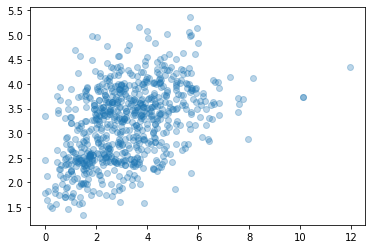

In [21]:
# catboost regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Split the data
X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
cbr = CatBoostRegressor(learning_rate=0.01, iterations=580)
cbr.fit(X_train, y_train, eval_set=(X_test, y_test))
# Score with RMSE
print('Score:', mean_squared_error(y_test, cbr.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, cbr.predict(X_test), alpha=0.3)

Score: 1.5327741258488177


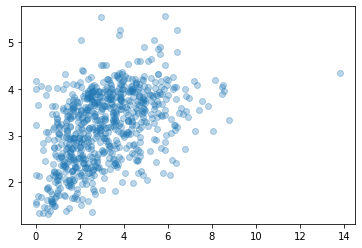

In [33]:
# catboost with scaled data
from sklearn.preprocessing import MinMaxScaler


# Split the data
X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
cbr = CatBoostRegressor(verbose=False)
cbr.fit(X_train, y_train, eval_set=(X_test, y_test))
# Score with RMSE
print('Score:', mean_squared_error(y_test, cbr.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, cbr.predict(X_test), alpha=0.3)

0:	learn: 1.7609262	test: 1.6720719	best: 1.6720719 (0)	total: 4.12ms	remaining: 4.12s
1:	learn: 1.7583339	test: 1.6699027	best: 1.6699027 (1)	total: 5.91ms	remaining: 2.95s
2:	learn: 1.7563199	test: 1.6681264	best: 1.6681264 (2)	total: 7.5ms	remaining: 2.49s
3:	learn: 1.7540793	test: 1.6660860	best: 1.6660860 (3)	total: 9.06ms	remaining: 2.25s
4:	learn: 1.7520417	test: 1.6642384	best: 1.6642384 (4)	total: 10.7ms	remaining: 2.12s
5:	learn: 1.7498203	test: 1.6623203	best: 1.6623203 (5)	total: 12.3ms	remaining: 2.04s
6:	learn: 1.7474214	test: 1.6604341	best: 1.6604341 (6)	total: 14.6ms	remaining: 2.07s
7:	learn: 1.7450689	test: 1.6587290	best: 1.6587290 (7)	total: 16.1ms	remaining: 2s
8:	learn: 1.7423832	test: 1.6567705	best: 1.6567705 (8)	total: 17.6ms	remaining: 1.94s
9:	learn: 1.7400848	test: 1.6547809	best: 1.6547809 (9)	total: 19.1ms	remaining: 1.9s
10:	learn: 1.7376329	test: 1.6527212	best: 1.6527212 (10)	total: 20.7ms	remaining: 1.86s
11:	learn: 1.7353516	test: 1.6508244	best: 1.6

106:	learn: 1.6007743	test: 1.5498803	best: 1.5498803 (106)	total: 196ms	remaining: 1.64s
107:	learn: 1.5999759	test: 1.5495395	best: 1.5495395 (107)	total: 199ms	remaining: 1.64s
108:	learn: 1.5988493	test: 1.5489621	best: 1.5489621 (108)	total: 201ms	remaining: 1.64s
109:	learn: 1.5979170	test: 1.5483841	best: 1.5483841 (109)	total: 204ms	remaining: 1.65s
110:	learn: 1.5968811	test: 1.5478670	best: 1.5478670 (110)	total: 206ms	remaining: 1.65s
111:	learn: 1.5959107	test: 1.5472189	best: 1.5472189 (111)	total: 209ms	remaining: 1.66s
112:	learn: 1.5950695	test: 1.5464915	best: 1.5464915 (112)	total: 211ms	remaining: 1.65s
113:	learn: 1.5941723	test: 1.5460200	best: 1.5460200 (113)	total: 213ms	remaining: 1.66s
114:	learn: 1.5932348	test: 1.5453244	best: 1.5453244 (114)	total: 215ms	remaining: 1.66s
115:	learn: 1.5925611	test: 1.5449072	best: 1.5449072 (115)	total: 218ms	remaining: 1.66s
116:	learn: 1.5917241	test: 1.5444009	best: 1.5444009 (116)	total: 220ms	remaining: 1.66s
117:	learn

286:	learn: 1.4944067	test: 1.5017458	best: 1.5017458 (286)	total: 581ms	remaining: 1.44s
287:	learn: 1.4938516	test: 1.5016771	best: 1.5016771 (287)	total: 582ms	remaining: 1.44s
288:	learn: 1.4934265	test: 1.5017590	best: 1.5016771 (287)	total: 584ms	remaining: 1.44s
289:	learn: 1.4930752	test: 1.5016528	best: 1.5016528 (289)	total: 586ms	remaining: 1.43s
290:	learn: 1.4926647	test: 1.5014545	best: 1.5014545 (290)	total: 587ms	remaining: 1.43s
291:	learn: 1.4922589	test: 1.5013831	best: 1.5013831 (291)	total: 589ms	remaining: 1.43s
292:	learn: 1.4918429	test: 1.5012405	best: 1.5012405 (292)	total: 591ms	remaining: 1.42s
293:	learn: 1.4913798	test: 1.5009417	best: 1.5009417 (293)	total: 592ms	remaining: 1.42s
294:	learn: 1.4908461	test: 1.5007345	best: 1.5007345 (294)	total: 597ms	remaining: 1.43s
295:	learn: 1.4903922	test: 1.5005839	best: 1.5005839 (295)	total: 599ms	remaining: 1.43s
296:	learn: 1.4900312	test: 1.5003525	best: 1.5003525 (296)	total: 602ms	remaining: 1.42s
297:	learn

383:	learn: 1.4606709	test: 1.4941912	best: 1.4941912 (383)	total: 770ms	remaining: 1.24s
384:	learn: 1.4604555	test: 1.4941298	best: 1.4941298 (384)	total: 773ms	remaining: 1.23s
385:	learn: 1.4601362	test: 1.4940673	best: 1.4940673 (385)	total: 776ms	remaining: 1.23s
386:	learn: 1.4598111	test: 1.4939595	best: 1.4939595 (386)	total: 778ms	remaining: 1.23s
387:	learn: 1.4595108	test: 1.4937676	best: 1.4937676 (387)	total: 779ms	remaining: 1.23s
388:	learn: 1.4592419	test: 1.4937177	best: 1.4937177 (388)	total: 781ms	remaining: 1.23s
389:	learn: 1.4590154	test: 1.4936813	best: 1.4936813 (389)	total: 783ms	remaining: 1.23s
390:	learn: 1.4587380	test: 1.4936979	best: 1.4936813 (389)	total: 789ms	remaining: 1.23s
391:	learn: 1.4583388	test: 1.4936473	best: 1.4936473 (391)	total: 792ms	remaining: 1.23s
392:	learn: 1.4581751	test: 1.4936874	best: 1.4936473 (391)	total: 794ms	remaining: 1.23s
393:	learn: 1.4580088	test: 1.4936032	best: 1.4936032 (393)	total: 796ms	remaining: 1.22s
394:	learn

481:	learn: 1.4328875	test: 1.4897528	best: 1.4896712 (478)	total: 960ms	remaining: 1.03s
482:	learn: 1.4325668	test: 1.4895918	best: 1.4895918 (482)	total: 962ms	remaining: 1.03s
483:	learn: 1.4322587	test: 1.4894989	best: 1.4894989 (483)	total: 964ms	remaining: 1.03s
484:	learn: 1.4319189	test: 1.4895495	best: 1.4894989 (483)	total: 966ms	remaining: 1.03s
485:	learn: 1.4316922	test: 1.4894623	best: 1.4894623 (485)	total: 968ms	remaining: 1.02s
486:	learn: 1.4314714	test: 1.4894221	best: 1.4894221 (486)	total: 969ms	remaining: 1.02s
487:	learn: 1.4311000	test: 1.4893446	best: 1.4893446 (487)	total: 972ms	remaining: 1.02s
488:	learn: 1.4308800	test: 1.4893096	best: 1.4893096 (488)	total: 974ms	remaining: 1.02s
489:	learn: 1.4306851	test: 1.4891990	best: 1.4891990 (489)	total: 975ms	remaining: 1.01s
490:	learn: 1.4304649	test: 1.4892393	best: 1.4891990 (489)	total: 978ms	remaining: 1.01s
491:	learn: 1.4302118	test: 1.4891698	best: 1.4891698 (491)	total: 980ms	remaining: 1.01s
492:	learn

583:	learn: 1.4058495	test: 1.4862267	best: 1.4860234 (577)	total: 1.15s	remaining: 820ms
584:	learn: 1.4056201	test: 1.4861819	best: 1.4860234 (577)	total: 1.15s	remaining: 818ms
585:	learn: 1.4053256	test: 1.4863337	best: 1.4860234 (577)	total: 1.15s	remaining: 816ms
586:	learn: 1.4051537	test: 1.4862905	best: 1.4860234 (577)	total: 1.16s	remaining: 814ms
587:	learn: 1.4048769	test: 1.4863763	best: 1.4860234 (577)	total: 1.16s	remaining: 814ms
588:	learn: 1.4047540	test: 1.4863604	best: 1.4860234 (577)	total: 1.16s	remaining: 812ms
589:	learn: 1.4045811	test: 1.4864218	best: 1.4860234 (577)	total: 1.17s	remaining: 810ms
590:	learn: 1.4043375	test: 1.4864443	best: 1.4860234 (577)	total: 1.17s	remaining: 808ms
591:	learn: 1.4040824	test: 1.4864027	best: 1.4860234 (577)	total: 1.17s	remaining: 806ms
592:	learn: 1.4038090	test: 1.4863855	best: 1.4860234 (577)	total: 1.17s	remaining: 804ms
593:	learn: 1.4035479	test: 1.4863661	best: 1.4860234 (577)	total: 1.17s	remaining: 801ms
594:	learn

683:	learn: 1.3824025	test: 1.4841575	best: 1.4841575 (683)	total: 1.34s	remaining: 619ms
684:	learn: 1.3822950	test: 1.4841508	best: 1.4841508 (684)	total: 1.34s	remaining: 618ms
685:	learn: 1.3820787	test: 1.4841445	best: 1.4841445 (685)	total: 1.35s	remaining: 617ms
686:	learn: 1.3818539	test: 1.4840563	best: 1.4840563 (686)	total: 1.35s	remaining: 615ms
687:	learn: 1.3815767	test: 1.4841777	best: 1.4840563 (686)	total: 1.35s	remaining: 613ms
688:	learn: 1.3813207	test: 1.4841631	best: 1.4840563 (686)	total: 1.35s	remaining: 612ms
689:	learn: 1.3811082	test: 1.4841300	best: 1.4840563 (686)	total: 1.36s	remaining: 610ms
690:	learn: 1.3809335	test: 1.4841303	best: 1.4840563 (686)	total: 1.36s	remaining: 607ms
691:	learn: 1.3805918	test: 1.4840917	best: 1.4840563 (686)	total: 1.36s	remaining: 608ms
692:	learn: 1.3803478	test: 1.4841951	best: 1.4840563 (686)	total: 1.37s	remaining: 606ms
693:	learn: 1.3800919	test: 1.4841794	best: 1.4840563 (686)	total: 1.37s	remaining: 605ms
694:	learn

780:	learn: 1.3600859	test: 1.4824287	best: 1.4823596 (779)	total: 1.53s	remaining: 429ms
781:	learn: 1.3599255	test: 1.4824039	best: 1.4823596 (779)	total: 1.54s	remaining: 428ms
782:	learn: 1.3597118	test: 1.4823534	best: 1.4823534 (782)	total: 1.54s	remaining: 427ms
783:	learn: 1.3595595	test: 1.4823649	best: 1.4823534 (782)	total: 1.54s	remaining: 425ms
784:	learn: 1.3593517	test: 1.4823913	best: 1.4823534 (782)	total: 1.54s	remaining: 423ms
785:	learn: 1.3590035	test: 1.4823775	best: 1.4823534 (782)	total: 1.54s	remaining: 421ms
786:	learn: 1.3586976	test: 1.4823200	best: 1.4823200 (786)	total: 1.55s	remaining: 419ms
787:	learn: 1.3583688	test: 1.4823621	best: 1.4823200 (786)	total: 1.55s	remaining: 417ms
788:	learn: 1.3581612	test: 1.4823602	best: 1.4823200 (786)	total: 1.55s	remaining: 415ms
789:	learn: 1.3577752	test: 1.4822326	best: 1.4822326 (789)	total: 1.55s	remaining: 413ms
790:	learn: 1.3576057	test: 1.4822880	best: 1.4822326 (789)	total: 1.56s	remaining: 411ms
791:	learn

880:	learn: 1.3386708	test: 1.4816598	best: 1.4814095 (852)	total: 1.72s	remaining: 233ms
881:	learn: 1.3384662	test: 1.4816260	best: 1.4814095 (852)	total: 1.73s	remaining: 231ms
882:	learn: 1.3381765	test: 1.4816288	best: 1.4814095 (852)	total: 1.73s	remaining: 229ms
883:	learn: 1.3379802	test: 1.4816575	best: 1.4814095 (852)	total: 1.73s	remaining: 227ms
884:	learn: 1.3377656	test: 1.4816128	best: 1.4814095 (852)	total: 1.73s	remaining: 225ms
885:	learn: 1.3374523	test: 1.4814874	best: 1.4814095 (852)	total: 1.73s	remaining: 223ms
886:	learn: 1.3372570	test: 1.4815305	best: 1.4814095 (852)	total: 1.73s	remaining: 221ms
887:	learn: 1.3370871	test: 1.4814045	best: 1.4814045 (887)	total: 1.74s	remaining: 219ms
888:	learn: 1.3369304	test: 1.4813488	best: 1.4813488 (888)	total: 1.74s	remaining: 217ms
889:	learn: 1.3368061	test: 1.4813618	best: 1.4813488 (888)	total: 1.74s	remaining: 215ms
890:	learn: 1.3364306	test: 1.4813783	best: 1.4813488 (888)	total: 1.74s	remaining: 213ms
891:	learn

979:	learn: 1.3181434	test: 1.4806246	best: 1.4806246 (979)	total: 1.91s	remaining: 39ms
980:	learn: 1.3178858	test: 1.4805882	best: 1.4805882 (980)	total: 1.92s	remaining: 37.1ms
981:	learn: 1.3177522	test: 1.4805465	best: 1.4805465 (981)	total: 1.92s	remaining: 35.2ms
982:	learn: 1.3174875	test: 1.4806118	best: 1.4805465 (981)	total: 1.92s	remaining: 33.2ms
983:	learn: 1.3173124	test: 1.4805639	best: 1.4805465 (981)	total: 1.92s	remaining: 31.2ms
984:	learn: 1.3170829	test: 1.4805796	best: 1.4805465 (981)	total: 1.92s	remaining: 29.3ms
985:	learn: 1.3167803	test: 1.4805978	best: 1.4805465 (981)	total: 1.92s	remaining: 27.3ms
986:	learn: 1.3164691	test: 1.4806452	best: 1.4805465 (981)	total: 1.93s	remaining: 25.4ms
987:	learn: 1.3160093	test: 1.4805975	best: 1.4805465 (981)	total: 1.93s	remaining: 23.4ms
988:	learn: 1.3157582	test: 1.4805426	best: 1.4805426 (988)	total: 1.93s	remaining: 21.5ms
989:	learn: 1.3156332	test: 1.4805008	best: 1.4805008 (989)	total: 1.93s	remaining: 19.5ms
9

,Field_ID,Yield
0,E9UZCEA,4.270137
1,1WGGS1Q,4.270137
2,EG2KXE2,4.270137
3,HC3GQXF,4.270137
4,7AK6GFK,4.270137


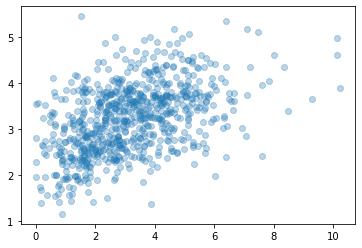

In [23]:
# using auto encoder
from tensorflow.keras.models import load_model


# scale the data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

# load encoder'
encoder = load_model("encoder.h5", compile=False)
X_train_encoder = encoder.predict(X_train)
X_test_encoder = encoder.predict(X_test)

# define the model
cbr1 = CatBoostRegressor(learning_rate=0.01)

cbr1.fit(X_train_encoder, y_train, eval_set=(X_test_encoder, y_test))

# Score with RMSE
print('Score:', mean_squared_error(y_test, cbr1.predict(X_test_encoder), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, cbr1.predict(X_test_encoder), alpha=0.3)

# Load the sample submission file
ss = pd.read_csv('data/SampleSubmission.csv')

# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='data/image_arrays_test') for fid in ss['Field_ID'].values])

# Get model predictions
preds = cbr1.predict(test_sampled)

# Store them in the submission dataframe and save
ss['Yield'] = preds
ss.to_csv('Sub.csv', index=False)
ss.head()

|# Saving Preds

Once we're happy with how we generate our inputs, we must process the test fields in the same way and save predictions. Here it is, condensed. Note the Field_IDs from the sample submission are used, and the same `process_im` function prepares the inputs, this time looking for .npy files in the 'image_arrays_test' folder. 

In [24]:
# Load the sample submission file
ss = pd.read_csv('data/SampleSubmission.csv')

# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='data/image_arrays_test') for fid in ss['Field_ID'].values])

# scale the data
t = MinMaxScaler()
t.fit(test_sampled)
test_sampled = t.transform(test_sampled)

# load encoder'
encoder = load_model("encoder.h5", compile=False)
test_sampled = encoder.predict(test_sampled)

# Get model predictions
preds = cbr1.predict(test_sampled)

# Store them in the submission dataframe and save
ss['Yield'] = preds
ss.to_csv('Sub.csv', index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,2.633463
1,1WGGS1Q,2.982403
2,EG2KXE2,2.981437
3,HC3GQXF,3.063476
4,7AK6GFK,3.094002


You can submit the Sub.csv file generated here on Zindi. This example scores ~2 (not as good as our score on our local test set, because the fields are more geographically separated). Now let's chat about ways to make this better:

## conclusion

catboostregressor doesnt reduce rmse try hyperparameter optimization to see if it improves.

